In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sm

In [40]:
s = sm.symbols('s')
alpha = 4e-7
beta = np.linspace(-0.055,0,1000)
s0 = [4e4]
delta = 0
gamma = 100
gamma2 = 1000
def tao(s,gamma):
    new_missions = delta/s + gamma
    return new_missions

# fig3(a)

In [43]:
solutions = []
for b in beta:  
    ds = alpha * s**2 + b * s + tao(s,gamma)  
    s_star = sm.solve(sm.Eq(ds, 0), s)  
    solutions.append(s_star)  

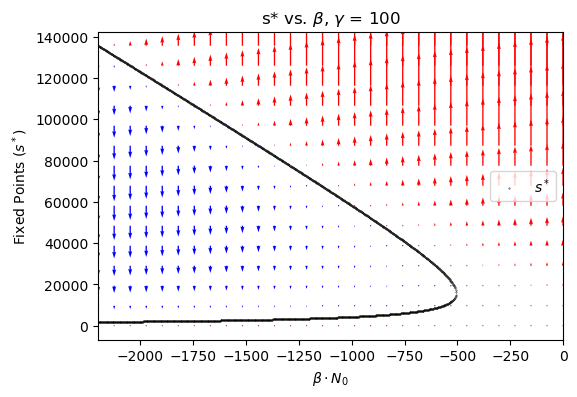

In [44]:
real_solutions = []

all_real_solutions = [[float(s.evalf()) for s in sol if s.is_real] for sol in solutions]
x = beta * s0
x_values = []
s_star_values = []
for i, sol_group in enumerate(all_real_solutions):
    x_values.extend([x[i]] * len(sol_group)) 
    s_star_values.extend(sol_group)

s_q, b_q = np.mgrid[1e-5:max(s_star_values):15j, min(beta):-1e-5:30j]

u = np.zeros_like(s_q)
v = alpha * s_q**2 + b_q * s_q + tao(s_q,gamma)
plt.figure(figsize=(6, 4))
plt.scatter(x_values, s_star_values, color='black', label='$s^*$', alpha=1, s=0.1)
C = np.where(v < 0, 0, 1) 
plt.quiver(b_q*s0, s_q, u, v, C, cmap='bwr') 
plt.xlim(min(x),0)
plt.xlabel(r"$\beta \cdot N_0$")
plt.ylabel("Fixed Points ($s^*$)")
plt.title(r"s* vs. $\beta$, $\gamma$ = 100")
plt.legend()
plt.show()

# fig3(b)

In [46]:
solutions = []
for b in beta: 
    ds = alpha * s**2 + b * s + tao(s,gamma2) 
    s_star = sm.solve(sm.Eq(ds, 0), s) 
    solutions.append(s_star)

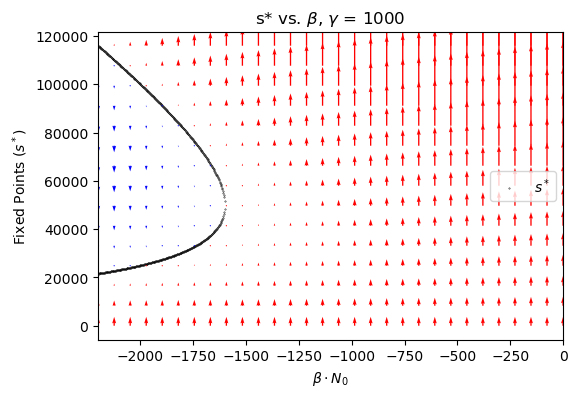

In [47]:
real_solutions = []

all_real_solutions = [[float(s.evalf()) for s in sol if s.is_real] for sol in solutions]
x = beta * s0

x_values = []
s_star_values = []
for i, sol_group in enumerate(all_real_solutions):
    x_values.extend([x[i]] * len(sol_group))  
    s_star_values.extend(sol_group)

s_q, b_q = np.mgrid[1e-5:max(s_star_values):15j, min(beta):-1e-5:30j]

u = np.zeros_like(s_q)  
v = alpha * s_q**2 + b_q * s_q + tao(s_q,gamma2)  
plt.figure(figsize=(6, 4))
plt.scatter(x_values, s_star_values, color='black', label='$s^*$', alpha=1, s=0.1)
C = np.where(v < 0, 0, 1)  
plt.quiver(b_q*s0, s_q, u, v, C, cmap='bwr') 
plt.xlim(min(x),0)
plt.xlabel(r"$\beta \cdot N_0$")
plt.ylabel("Fixed Points ($s^*$)")
plt.title(r"s* vs. $\beta$, $\gamma$ = 1000")
plt.legend()
plt.show()